In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [10]:
df=pd.read_excel("Advertising.xlsx")

In [11]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## BASIC CHECK

In [15]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [18]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [20]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [24]:
df.shape

(200, 5)

In [26]:

df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [28]:
df.Sales.unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [30]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [32]:
df.loc[df['Sales']==0] # for checking any zero

,Unnamed: 0,TV,Radio,Newspaper,Sales


## VISUALISATION

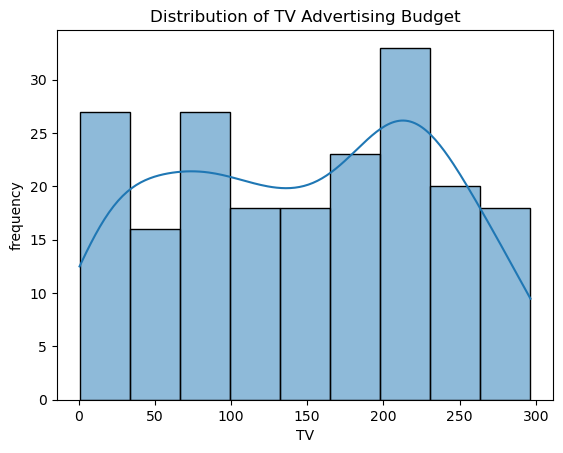

In [26]:
sns.histplot(df['TV'], kde=True)
plt.title("Distribution of TV Advertising Budget")
plt.xlabel('TV')
plt.ylabel('frequency')
    
plt.show()

TV and Radio budgets have a wide distribution, meaning companies are spending varied amounts on them.
Newspaper budgets are more clustered and lower compared to TV and Radio.

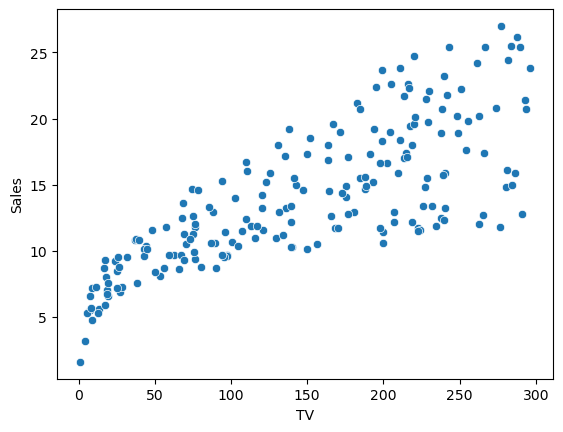

In [29]:
sns.scatterplot(x='TV', y='Sales', data=df)
plt.show()

There is a strong positive correlation between TV advertisement spending and Sales — as TV budget increases, sales tend to increase.
Radio also shows a moderate positive correlation with Sales.

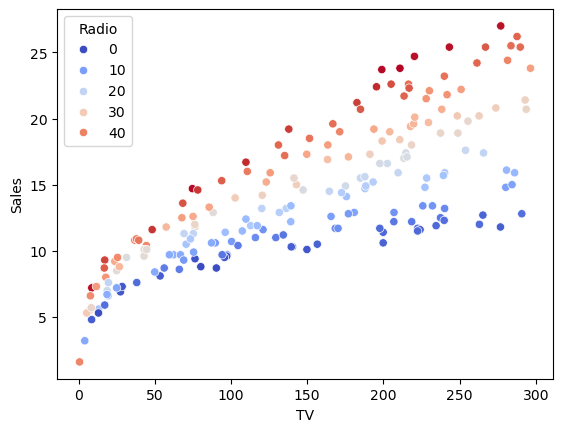

In [32]:
sns.scatterplot(x='TV', y='Sales', hue='Radio', data=df, palette='coolwarm')
plt.show()

When combining TV and Radio budgets, we can predict Sales more accurately.
A multivariate scatter plot shows that high spending on both TV and Radio leads to higher Sales.

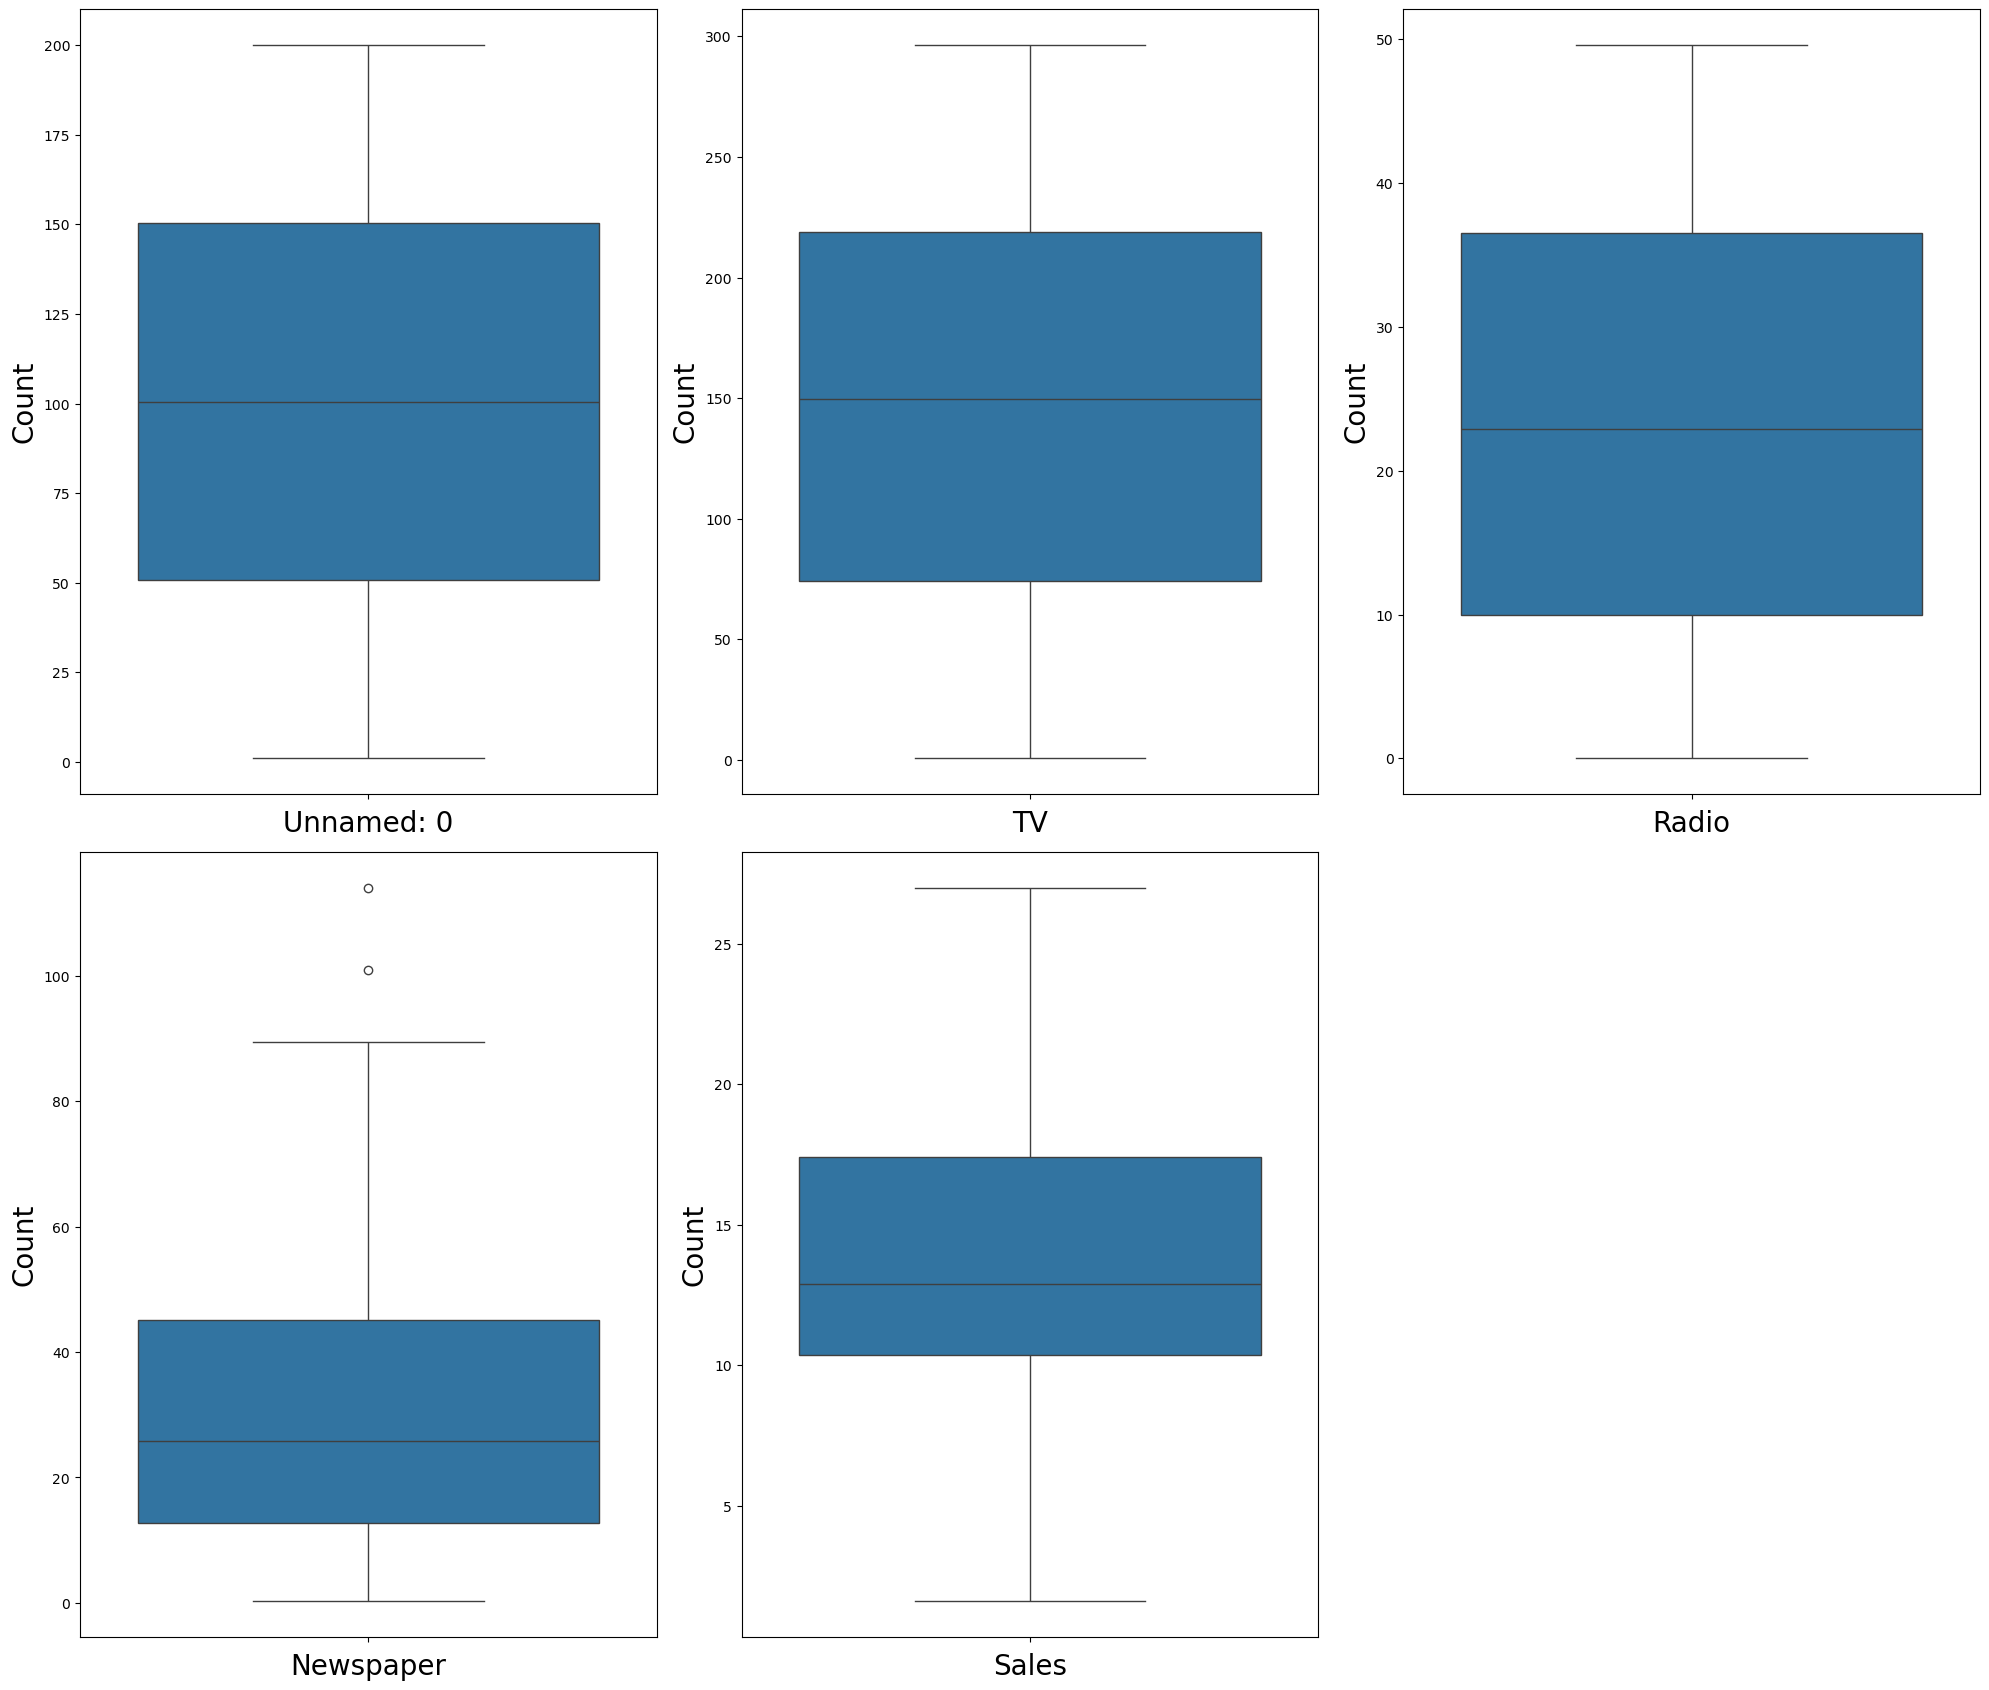

In [35]:
plt.figure(figsize=(20, 25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Count", fontsize=20)
        plotnumber += 1

plt.tight_layout()

In [3]:
Q1 = df.Newspaper.quantile(0.25)  # Q1 is 25%
Q3 = df.Newspaper.quantile(0.75)  # Q3 is 75%
IQR = Q3 - Q1

lower_boundry = Q1 - 1.5 * IQR
print(lower_boundry)

upper_boundry = Q3 + 1.5 * IQR
print(upper_boundry)

df.loc[df["Newspaper"] > upper_boundry, "Newspaper"] = np.median(df.Newspaper)
# upper_boundary we gave because outlier is present in upper layer


NameError: name 'df' is not defined

<Axes: ylabel='Newspaper'>

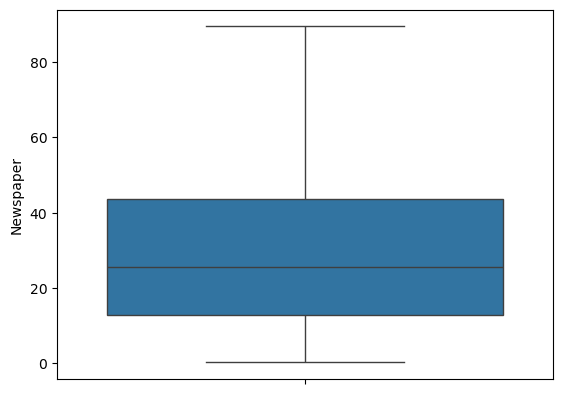

In [37]:
sns.boxplot(y=df['Newspaper'])

## FEATURE ENGINEERING

In [40]:
df = df.drop(columns=["Unnamed: 0"])


In [42]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [84]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()

In [110]:
tv_scaled = scaler.fit_transform(df[['TV']])
radio_scaled = scaler.fit_transform(df[['Radio']])
newspaper_scaled = scaler.fit_transform(df[['Newspaper']])


In [120]:
tv_df = pd.DataFrame(tv_scaled, columns=['TV_scaled'])
radio_df = pd.DataFrame(radio_scaled, columns=['Radio_scaled'])
newspaper_df = pd.DataFrame(newspaper_scaled, columns=['Newspaper_scaled'])

In [118]:
df_final = pd.concat([df, tv_df, radio_df, newspaper_df], axis=1)

In [122]:
print("Scaled Columns:", ['TV_scaled', 'Radio_scaled', 'Newspaper_scaled'])


Scaled Columns: ['TV_scaled', 'Radio_scaled', 'Newspaper_scaled']


In [114]:
print(df_final.head())

      TV  Radio  Newspaper  Sales  TV_scaled  Radio_scaled  Newspaper_scaled
0  230.1   37.8       69.2   22.1   0.775786      0.762097          0.605981
1   44.5   39.3       45.1   10.4   0.148123      0.792339          0.394019
2   17.2   45.9       69.3    9.3   0.055800      0.925403          0.606860
3  151.5   41.3       58.5   18.5   0.509976      0.832661          0.511873
4  180.8   10.8       58.4   12.9   0.609063      0.217742          0.510994


In [106]:
df.head()

,TV,Radio,Newspaper,Sales,TV_scaled,Radio_scaled,Newspaper_scaled
0,230.1,37.8,69.2,22.1,0.775786,0.762097,0.773288
1,44.5,39.3,45.1,10.4,0.148123,0.792339,0.502806
2,17.2,45.9,69.3,9.3,0.055800,0.925403,0.774411
3,151.5,41.3,58.5,18.5,0.509976,0.832661,0.653199
4,180.8,10.8,58.4,12.9,0.609063,0.217742,0.652076


In [69]:
df.shape

(200, 4)

In [71]:
x=df[['TV','Radio','Newspaper']]
y=df.Sales

In [73]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [75]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [77]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [81]:
x_train

,TV,Radio,Newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7
...,...,...,...
68,237.4,27.5,11.0
168,215.4,23.6,57.6
185,205.0,45.1,19.6
35,290.7,4.1,8.5


In [83]:
x_test

,TV,Radio,Newspaper
135,48.3,47.0,8.5
127,80.2,0.0,9.2
191,75.5,10.8,6.0
66,31.5,24.6,2.2
119,19.4,16.0,22.3
111,241.7,38.0,23.2
81,239.8,4.1,36.9
36,266.9,43.8,5.0
126,7.8,38.9,50.6
187,191.1,28.7,18.2


In [87]:
y_test

135    11.6
127     8.8
191     9.9
66      9.5
119     6.6
111    21.8
81     12.3
36     25.4
126     6.6
187    17.3
85     15.2
49      9.7
155     3.2
121     7.0
50     11.4
195     7.6
24      9.7
43     12.9
9      10.6
153    19.0
44      8.5
46     10.6
103    14.7
53     21.2
159    12.9
65      9.3
179    12.6
40     16.6
92     19.4
89     16.7
144    11.4
98     25.4
14     19.0
86     12.0
145    10.3
171    14.5
63     14.0
194    17.3
174    11.5
72      8.8
Name: Sales, dtype: float64

In [89]:
y_train

16     12.5
51     10.7
97     15.5
164    11.9
71     12.4
       ... 
68     18.9
168    17.1
185    22.6
35     12.8
129     9.7
Name: Sales, Length: 160, dtype: float64

In [91]:
len(y_train)

160

In [93]:
len(y_test)

40

In [95]:
len(x_test)

40

In [97]:
len(x_train)

160

In [99]:
from sklearn.linear_model import LinearRegression

In [101]:
LR=LinearRegression()

In [103]:
LR.fit(x_train,y_train)

LinearRegression()

In [105]:
y_predict=LR.predict(x_test)

In [107]:
y_predict

array([13.95446559,  6.56096843,  8.37730268,  8.96942642,  6.81536408,
       21.0724867 , 14.61616898, 23.29712852, 10.61869678, 17.01582341,
       15.20861013,  8.17851346,  5.27853174,  7.88197539, 12.60600345,
        5.34954895,  8.12465182, 13.92041312, 12.501818  , 18.19974255,
        8.91614106,  8.87644672, 14.70561647, 19.95309416, 12.38660642,
        7.79536974, 12.33553347, 16.34015654, 19.16036183, 16.93591248,
       10.0968486 , 24.0871139 , 18.4187788 , 11.56426295,  9.65330308,
       14.35933948, 13.15512731, 16.42132385, 13.67471724, 10.34934211])

In [109]:
y_test # actual value

135    11.6
127     8.8
191     9.9
66      9.5
119     6.6
111    21.8
81     12.3
36     25.4
126     6.6
187    17.3
85     15.2
49      9.7
155     3.2
121     7.0
50     11.4
195     7.6
24      9.7
43     12.9
9      10.6
153    19.0
44      8.5
46     10.6
103    14.7
53     21.2
159    12.9
65      9.3
179    12.6
40     16.6
92     19.4
89     16.7
144    11.4
98     25.4
14     19.0
86     12.0
145    10.3
171    14.5
63     14.0
194    17.3
174    11.5
72      8.8
Name: Sales, dtype: float64

In [115]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error

In [117]:
mean_squared_error(y_test,y_predict)

2.0485576116405175

In [119]:
r2_score(y_test,y_predict)

0.9200846680148507

In [121]:
adjusted_r2=1-(1-0.89)*(40-1)/(40-3-1)
adjusted_r2

0.8808333333333334

In [123]:
import math

In [125]:
print(math.sqrt(mean_squared_error(y_test,y_predict)))

1.4312783138301641


In [127]:
root_mean_squared_error(y_test,y_predict)

1.4312783138301641

In [129]:
mean_absolute_error(y_test,y_predict)

1.1458629205525592